In [1]:
import cv2
import numpy as np
from lloyd_python import lloyds
from matplotlib import pyplot as plt

Function to generate codebook and partition for uniform quantizer

In [2]:
def generateUniform(s):
    '''
    performs uniform quantization
    on the image I.
    Outputs a s level image
    '''
    step = 255/pow(2,s)
    partition = np.arange(step,255,step)
    codebook = (np.arange(0,pow(2,s))+0.5)*step
    return partition, codebook

Function quantizes a images given a codebook and partiion

In [3]:
def quantize(I, partition, codebook):
    '''
    Performs quantization on input image based on
    the codebook and partition passed
    Returns quantized image
    '''
    I_op = np.ones_like(I)*codebook[0]
    for i in range(len(partition)-1):
        I_op[np.logical_and(I>partition[i] ,I<=partition[i+1])]=codebook[i+1]
    I_op[I>partition[-1]] = codebook[-1]
    I_op = np.rint(I_op)
    return I_op

Function to perform uniform quantization

In [4]:
def uniformQuantize(I,s):
    '''
    Fucntion first generates partition and codebook
    and then perfrom quantization using the 2
    '''
    partition, codebook = generateUniform(s)
    I_uniform = quantize(I,partition, codebook)
    return I_uniform

Function calculates MSE between 2 images

In [5]:
def calculateMSE(I1, I2):
    '''
    Calculate the MSE between I1 and I
    '''
    MSE = np.mean(np.square(I1-I2))
    return MSE

Helper function to sweep across different bit lebels

In [6]:
def sweep(I):
    MSE_Uniform = []
    MSE_MaxLLoyd = []
    m = I.shape[0]
    n = I.shape[1]
    for s in range(1,8):
        I_uniform = uniformQuantize(I,s)
        partition, codebook = lloyds(I.reshape((m*n,1)), [pow(2,s)])
        I_MaxQuant = quantize(I, partition, codebook)
        MSE_Uniform.append(calculateMSE(I, I_uniform))
        MSE_MaxLLoyd.append(calculateMSE(I, I_MaxQuant))
    return MSE_MaxLLoyd, MSE_Uniform

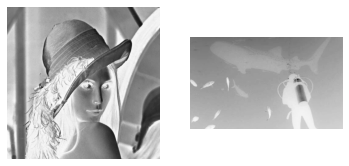

In [7]:
I1 = cv2.imread('lena512.tif')
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)
I2 = cv2.imread('diver.tif')
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(I1, cmap= 'Greys')
plt.axis('off')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(I2, cmap= 'Greys')

In [8]:
I_uniform = uniformQuantize(I1,5)

Unifrom Quantization vs Lloyd Max Quantization over Lena.tif

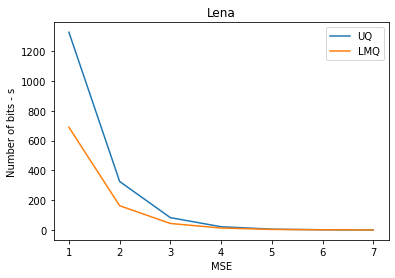

In [9]:
MSE_MaxLLoyd, MSE_Uniform = sweep(I1)
plt.plot(np.arange(1,8),MSE_Uniform, label = 'UQ')
plt.plot(np.arange(1,8), MSE_MaxLLoyd, label = 'LMQ')
plt.legend()
plt.xlabel('MSE')
plt.ylabel('Number of bits - s')
plt.title('Lena')
plt.show()

Unifrom Quantization vs Lloyd Max Quantization over Diver.tif

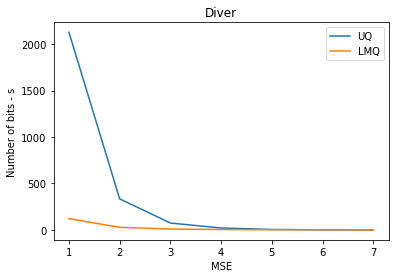

In [10]:
MSE_MaxLLoyd, MSE_Uniform = sweep(I2)
ax = plt.plot(np.arange(1,8),MSE_Uniform, label = 'UQ')
ax = plt.plot(np.arange(1,8), MSE_MaxLLoyd, label = 'LMQ')
plt.title('Diver')
plt.xlabel('MSE')
plt.ylabel('Number of bits - s')
plt.legend()
plt.show()

(ii)\
Uniform quantization show similar trends across the 2 images and perfroms worse in comparision to the LLoyd Max Quantizer.\
The Lloyd Max Quantizer does a better job in preserving the information or reduces the loss of information by mapping the relevant region of the input values with more information (or more pixels) to finer levels and regions with lower amount of information ( or lesser pixels) to wider levels.
The plot below shows this for Lena, for s = 4\
The performance gap between the 2 images is mainly because of the nature of the 2 images. Lena image has more contrast, that is it has a more spread out histogram than diver image. This leads to more loss of information or larger MSE with uniform quantization in comparision to Lloyd Max quantization

<function matplotlib.pyplot.show(close=None, block=None)>

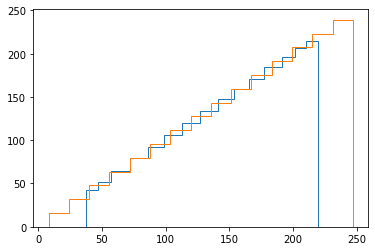

In [11]:
m = I1.shape[0]
n = I1.shape[1]
partition, codebook = lloyds(I1.reshape((m*n,1)), [pow(2,4)])
plt.stairs(partition, codebook, label = 'LMQ')
partition, codebook = generateUniform(4)
plt.stairs(partition, codebook, label = 'UQ')
plt.legend
plt.show

Unifrom Quantization vs Lloyd Max Quantization over Lena.tif after global histogram equalization

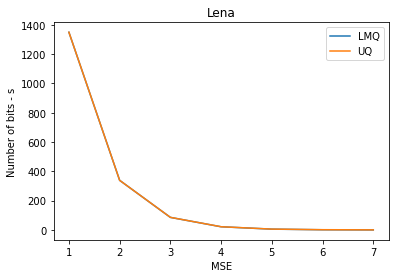

In [14]:
I1 = cv2.equalizeHist(I1)
MSE_MaxLLoyd, MSE_Uniform = sweep(I1)
ax = plt.plot(np.arange(1,8), MSE_MaxLLoyd, label = 'LMQ')
ax = plt.plot(np.arange(1,8),MSE_Uniform, label = 'UQ')
plt.title('Lena')
plt.xlabel('MSE')
plt.ylabel('Number of bits - s')
plt.legend()
plt.show()

Unifrom Quantization vs Lloyd Max Quantization over Lena.tif after global histogram equalization

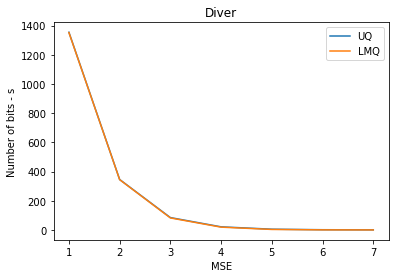

In [13]:
I2 = cv2.equalizeHist(I2)
MSE_MaxLLoyd, MSE_Uniform = sweep(I2)
ax = plt.plot(np.arange(1,8),MSE_Uniform, label = 'UQ')
ax = plt.plot(np.arange(1,8), MSE_MaxLLoyd, label = 'LMQ')
plt.title('Diver')
plt.xlabel('MSE')
plt.ylabel('Number of bits - s')
plt.legend()
plt.show()

(iii)\
Equalization leads to lloyd max quantizer behaving like a uniform quantizer.\
(iv)\
The MSE tends to zero for s = 7 as size of the level i.e. $t_{i} - t_{i-1}$ reduces as we increase s or the number of levels. The max possible quantization error is the least in this case which leads to near 0 MSE. Intuitively speaking, s = 7 has lowset loss of information due to the quantization process.Histogram equalization aids Lloyd Max quantizer similar to Uniform Quantizer. This is because after histogram equalization the Lloyd max quantizer tends to behave like a uniform quantizer as the pixel intensities are now uniformly distributed.